# 한국 지역내총생산(GRDP)의 증가율과 고용률의 관계에 대한 가설 검정
경제 성장이 고용 창출을 이루어 내는지에 대한 연구를 통하여 관련성을 입증하고, 특히 한국의 각 지역별(광역시, 특별시, 도)의 총생산과 고용률을 데이터로 사용하여 연구함으로써 수도권과 지방의 불균형으로 인해 지방 소멸이 큰 문제로 대두되고 있는 한국에서 각 지역의 경제적 특성과 요구에 맞춘 정책 개발과 실행을 가능케 하며, 지역 간 불균형 해소, 사회적 안정, 자원 활용, 경제 경쟁력 강화 등에 도움을 줄 수 있다.

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import boxcox, shapiro
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False
%matplotlib inline

df1 = pd.read_excel("grdp.xlsx", index_col=0) # use first column as index
df2 = pd.read_csv("employment.csv", encoding='cp949', index_col=0) 

        전국    서울    부산    대구    인천    광주    대전  울산  세종    경기   강원    충북    충남   
1986  10.8  10.8   9.1  10.8   9.8   NaN   NaN NaN NaN  16.3  8.3   2.1  11.1  \
1987  12.3  13.8  10.4  12.9  13.5   NaN   NaN NaN NaN  17.9  7.2   5.5   6.7   
1988  12.1  10.6   9.5   7.7  15.1  20.7   NaN NaN NaN  14.6  4.3  11.4  12.3   
1989   6.9   7.6   1.4   4.2   7.3   7.2   NaN NaN NaN  10.0  4.8  10.6 -26.8   
1990  10.3  10.3  14.7  13.6  15.8  13.6  14.5 NaN NaN  13.2  4.3  10.2   1.0   

        전북    전남    경북    경남    제주  
1986   8.2   6.9  15.5  10.0   3.5  
1987   4.1 -15.8  11.7  10.7  12.9  
1988  13.7  13.5  14.6  13.1   9.4  
1989   0.0   2.3   0.5   6.1  21.9  
1990   4.0   7.7   2.9  11.9   1.3  


<AxesSubplot: >

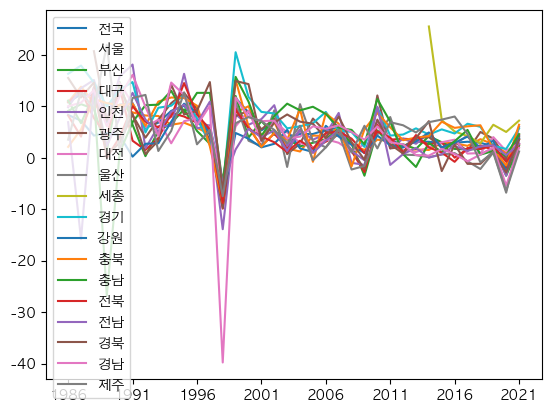

In [19]:
# 변수1 (GRDP 성장률) 데이터 전처리
df1 = df1.T
print(df1.head())
df1.astype(float).plot()

         계  서울특별시  부산광역시  대구광역시  인천광역시  광주광역시  대전광역시  울산광역시  세종특별자치시   경기도   
2000  61.5   60.9   58.4   59.2   61.5   55.9   57.8   59.3      NaN  63.1  \
2001  62.2   61.5   59.3   60.3   62.6   57.4   59.7   60.0      NaN  63.4   
2002  63.4   62.4   61.7   62.0   63.8   59.3   61.8   62.3      NaN  64.3   
2003  63.0   62.6   59.2   61.0   62.7   57.9   60.9   61.3      NaN  63.5   
2004  63.8   63.8   59.6   62.2   62.7   58.5   60.7   61.8      NaN  64.3   

       강원도  충청북도  충청남도  전라북도  전라남도  경상북도  경상남도   제주도  
2000  60.9  61.6  64.5  59.8  65.2  66.0  62.1  69.0  
2001  60.5  61.6  65.2  61.0  65.9  66.6  63.1  69.8  
2002  62.7  62.9  66.3  61.2  67.4  67.2  63.6  71.4  
2003  61.9  61.5  66.1  61.9  68.1  68.0  65.6  72.6  
2004  63.1  62.4  67.7  61.8  68.5  68.3  66.0  71.8  


<AxesSubplot: >

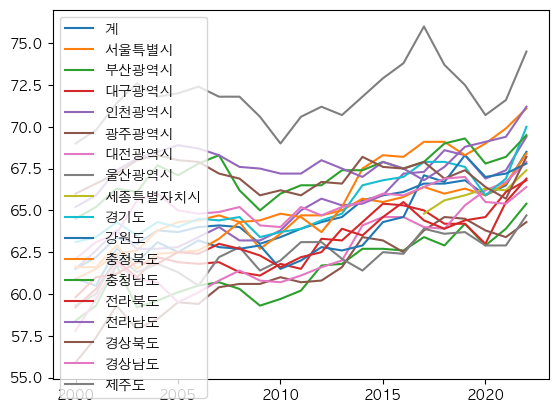

In [20]:
# 변수2 (고용률) 데이터 전처리
df2 = df2.T
print(df2.head())
df2.astype(float).plot()

## 귀무가설 (H0)
지역내경제성장률의 증가와 고용률의 증가는 관계가 없다. (등락을 같이 하지 않는다)
## 대립가설 (Ha)
지역내경제성장률이 증가하니 고용률도 증가했다. (등락을 같이 한다)

아마 growth rate가 높을 때와 그렇지 않을 때의 고용률의 추이를 보면 되지 않을까?
- 그러면 데이터 전처리를 GRDP 증가가 높을때의 고용률과 그렇지 않을 때의 고용률로 나누고하면 될듯?
- 성장률 평균을 계산하여 평균보다 높을때와 낮을때의 케이스들을 보면 된다

증가율로 하지 말고 GRDP 자체로 하는것도 좋을 듯
- 뭐 서울은 두 변수 사이의 상관관계가 있는데 부산은 관계가 없다 같은걸로 해도 될듯

In [44]:
# 먼저 서울특별시의 GRDP성장률과 고용률만 비교를 해보자.
'''
서울의 평균 GRDP 성장률은 5.57%
평균 성장률이 5.57%와 같거나 높은 년도와 낮은 년도의 고용률을 나누기 위해서 데이터 전처리를 한다.
둘의 비교
'''
#df1 = df1.T
#df2 = df2.T
seoul1 = df1.iloc[1:2,14:]
seoul2 = df2.iloc[1:2,:22]
seoul1 = seoul1.T
seoul2 = seoul2.T
print(seoul1)
print(seoul2)

        서울
2000  10.0
2001   4.3
2002   6.9
2003   1.8
2004   1.2
2005   4.3
2006   4.2
2007   5.9
2008   2.5
2009   1.5
2010   3.5
2011   3.2
2012   1.4
2013   1.6
2014   1.5
2015   2.9
2016   2.8
2017   2.3
2018   3.6
2019   2.6
2020   0.9
2021   3.5
      서울특별시
2000   60.9
2001   61.5
2002   62.4
2003   62.6
2004   63.8
2005   64.3
2006   64.4
2007   64.7
2008   64.3
2009   62.7
2010   63.6
2011   64.7
2012   64.7
2013   65.0
2014   65.7
2015   65.5
2016   65.8
2017   66.4
2018   66.0
2019   66.3
2020   65.9
2021   66.6


In [46]:
seoul1 = sm.add_constant(seoul1)

model = sm.OLS(seoul2, seoul1)
result = model.fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  서울특별시   R-squared:                       0.263
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     7.148
Date:                Tue, 16 May 2023   Prob (F-statistic):             0.0146
Time:                        23:09:40   Log-Likelihood:                -37.837
No. Observations:                  22   AIC:                             79.67
Df Residuals:                      20   BIC:                             81.86
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         65.7210      0.565    116.378      0.0